In [10]:
using GenericLinearAlgebra
using SymPy
using PyCall
using PyPlot
using LinearAlgebra
using NBInclude
@nbinclude("julia_OBE_funtions.ipynb") 
#using julia_OBE_funtions.ipynb as OBE


np = pyimport("numpy")

PyObject <module 'numpy' from '/Users/sofiapedraza/.julia/conda/3/x86_64/lib/python3.10/site-packages/numpy/__init__.py'>

## Time-dependent Solutions

### Example: Time evolution of the state vector

First let us consider the state vector for a two-level system $|\psi(t)\rangle = c_1(t)|1\rangle + c_2(t)|2\rangle$ which can be written as
$$|\psi(t)\rangle = \begin{pmatrix} c_1(t) \\ c_2(t) \end{pmatrix}.$$

The time evolution of the state vector is of course governed by the Schrödinger equation
$$i\hbar\frac{\partial |\psi\rangle}{\partial t} = \hat{H}|\psi\rangle.$$

The state at a time $t$ is then given by
$$|\psi(t)\rangle = \exp\left(-i\hat{H}t\right) |\psi(0)\rangle$$
where $\hat{H}$ is the time-independent Hamiltonian describing the evolution of the state vector, and $|\psi(0)\rangle$ is the state vector at time $t=0$. (We have set $\hbar=1$ for simplicity).



In [15]:
Deltas = [1]
Omegas = [2]
Gammas = [5]
gammas = [0.1]
Ldecay = L_decay(Gammas)
Ldeph = L_dephasing(gammas)
L = Ldecay+Ldeph
H = Hamiltonian(Omegas, Deltas)
master=Master_eqn(H,L)
coeff_mat=OBE_matrix(master)
svd=SVD(coeff_mat)
#x = time_dep_matrix(Omegas, Deltas, Gammas, gammas)


4-element Vector{ComplexF64}:
  0.8943089430894309 + 0.0im
 0.10162601626016271 + 0.2642276422764228im
 0.10162601626016259 - 0.26422764227642276im
 0.10569105691056908 - 8.548012852363114e-19im

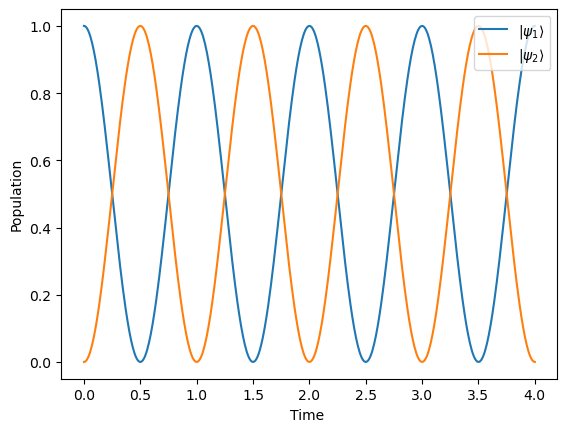

In [16]:
# Define time array
times = range(0, stop=8 * π, length=500)

# Define parameters
Omegas = [1.0]
Deltas = [0.0]

# Create Hamiltonian
H = Hamiltonian(Omegas, Deltas)

# Define initial state vector at t=0
psi_0 = [1.0, 0.0]

# Initialize array to store populations
#pops = zeros(Complex{Float64}, length(times), 2)
pops = zeros(Float64, length(times), 2)

for (i, t) in enumerate(times)
    sol = time_evolve(-1.0im * H, t, psi_0) # Perform time evolution
    c_1, c_2 = sol[1], sol[2]  # Extract coefficients
    # Calculate populations
    factor = abs2(c_1) + abs2(c_2) 
    popn = [abs2(c_1), abs2(c_2)]
    pops[i, :] = popn / factor
end

figure()
plot(times / (2 * π), pops[:, 1], label = L"|\psi_1\rangle")
plot(times / (2 * π), pops[:, 2], label = L"|\psi_2\rangle")
legend(loc="upper right")
#xlabel("Time (\$2\\pi/\\Omega\$)")
xlabel("Time ")
ylabel("Population")
show()

As can be seen from the figure, the populations oscillate sinusoidally with a period $\Omega$. This is known as Rabi flopping.

### Example: Time evolution of the density matrix (2-level system)

Considering only the state vector, it is not possible to consider the effects of decay. To do this we need to consider the density matrix $\rho$ and its time evolution. We can write the equation governing the time-evolution of the density matrix as 
$$\frac{\partial \rho_{\rm{vect}}}{\partial t} = \hat{M} \rho_{\rm{vect}}$$
where $\rho_{\rm{vect}}$ is a vector that contains all the elements of the density matrix, and $\hat{M}$ is matrix of time-independent coefficients found from the Master equation.
Then we can find the values of $\rho_{\rm{vect}}$ at any time $t$ through
$$\rho_{\rm{vect}}(t) = \exp\left(\hat{M}t\right)\rho_{\rm{vect}}(0)$$
where $\rho_{\rm{vect}}(0)$ is the value of the density matrix in vector form at $t=0$.

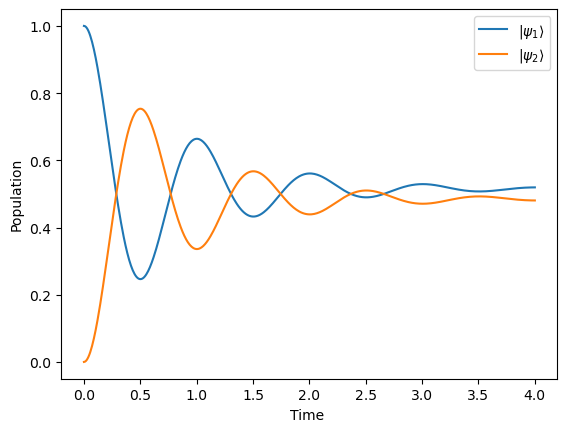

In [17]:
# Define time array
times = range(0, stop=8 * π, length=500)

# Define parameters
Omegas = [1.0]
Deltas = [0.0]
Gammas = [Omegas[1] / 4.0]
M = time_dep_matrix(Omegas, Deltas, Gammas)

# Define initial density matrix
rho_0 = [1.0, 1.0, 1.0, 0.0]
rho_t = zeros(Float64, length(times), 4)
pops = zeros(Float64, length(times), 2)

for (i, t) in enumerate(times)
    sol = time_evolve(M, t, rho_0) # Perform time evolution
    rho_11, rho_22 = real(sol[1]), real(sol[4]) # Extract populations
    # Calculate factor and populations
    factor = rho_11 + rho_22
    popn = [rho_11, rho_22]
    pops[i, :] = popn / factor
end

figure()
plot(times / (2 * π), pops[:, 1], label = L"|\psi_1\rangle")
plot(times / (2 * π), pops[:, 2], label = L"|\psi_2\rangle")
legend(loc="upper right")
#xlabel("Time (\$2\\pi/\\Omega\$)")
xlabel("Time ")
ylabel("Population")
show()

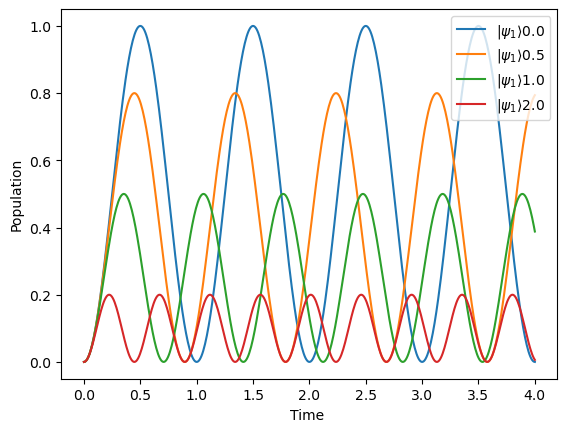

In [23]:
# Define time array
times = range(0, stop=8 * π, length=500)

# Define parameters

Omega1 = [1.0]
Delta1 = [0.0]
Delta2 = [0.5]
Delta3 = [1.0]
Delta4 = [2.0]
Deltas = [Delta1, Delta2, Delta3, Delta4]
# Define initial state vector at t=0
psi_0 = [1.0, 0.0]
deltaome=[0.0,1/2,1,2]

# Create Hamiltonian
#Make a plot of the populations of the first state for each of the different detunings

#Make a hamiltonian for each of the different detunings
figure()
for i in 1:length(Deltas)
    H = Hamiltonian(Omega1, Deltas[i[1]])
    # Initialize array to store populations for each detuning
    pops = zeros(Complex{Float64}, length(times), 2)

    #Evolve the system for each detuning
    for (j, t) in enumerate(times)
        sol = time_evolve(-1.0im * H, t, psi_0) # Perform time evolution
        c_1, c_2 = sol[1], sol[2]  # Extract coefficients
        # Calculate populations
        factor = abs2(c_1) + abs2(c_2) 
        popn = [abs2(c_1), abs2(c_2)]
        pops[j, :] = popn / factor
        
    end
    val=deltaome[i]
    #pops = zeros(Float64, length(times), 2)
    plot(times / (2 * π), pops[:, 2], label = L"|\psi_1\rangle "*"$val")
    
    
end

legend(loc="upper right")
#xlabel("Time (\$2\\pi/\\Omega\$)")
xlabel("Time ")
ylabel("Population")


show()